# 马科维茨资产配置 AI 让你买得最多的是纳指还是证券？

In [8]:
import pandas as pd
import akshare as ak 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [6]:
funds = {'012363': '国泰证券',
    '015916': '永赢医药',
    '013275': '富国煤炭',
    '270042': '广发纳指100',  
    '017437': '华宝纳指精选'}
data = pd.DataFrame()

In [7]:
print('🚀 开始抓取数据...')
for code,name in funds.items():
    print(f'📥{name}')
    df = ak.fund_open_fund_info_em(symbol=code,indicator='单位净值走势')
    df['净值日期'] = pd.to_datetime(df['净值日期'])
    df['单位净值'] = pd.to_numeric(df['单位净值'])
    df = df.sort_values('净值日期').set_index('净值日期')
    recent = df.tail(120)
    data[name] = recent['单位净值']
returns = data.pct_change().dropna()
print('✅ 数据准备完毕！')
data.head()


🚀 开始抓取数据...
📥国泰证券
📥永赢医药
📥富国煤炭
📥广发纳指100
📥华宝纳指精选
✅ 数据准备完毕！


/var/folders/dw/6xq25tmj0v3_xh9q6vyckgt00000gn/T/ipykernel_7273/3740432312.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


,国泰证券,永赢医药,富国煤炭,广发纳指100,华宝纳指精选
净值日期,,,,,
2025-06-20,1.0140,1.5005,1.728,6.4621,1.8686
2025-06-23,1.0249,1.5388,1.753,6.5226,1.8797
2025-06-24,1.0496,1.5504,1.746,6.6081,1.9184
2025-06-25,1.1035,1.5528,1.745,6.6233,1.9242
2025-06-26,1.0855,1.5266,1.736,6.6791,1.9507


In [9]:
num_portfolios = 3000
all_weights = []
all_returns = []
all_vols = []#volatility (波动率/风险)
print(f'🎲 开始模拟{num_portfolios}种组合...')
for i in range(num_portfolios):
    weights = np.random.random(len(funds))
    weights = weights / np.sum(weights)
    all_weights.append(weights) 
    ret = np.sum(returns.mean()*weights ) *252
    all_returns.append(ret)
    cov_matrix =returns.cov() *252
    variance = np.dot(weights.T,np.dot(cov_matrix,weights))
    vol = np.sqrt(variance)
    all_vols.append(vol)
print('✅ 模拟结束！')

🎲 开始模拟3000种组合...
✅ 模拟结束！


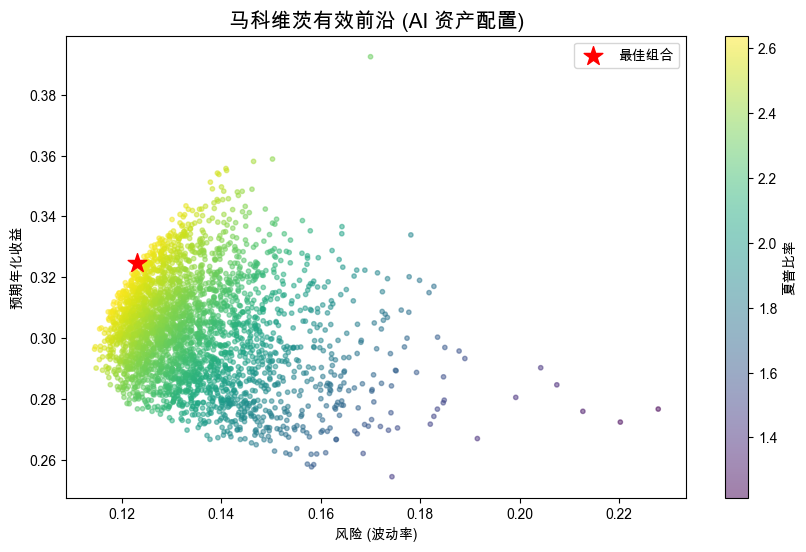

------------------------------
🏆 AI 建议的最佳仓位：
国泰证券:14.49%
永赢医药:7.42%
富国煤炭:16.49%
广发纳指100:29.21%
华宝纳指精选:32.38%
------------------------------
预期年化收益:32.46%


In [12]:
portfolios = pd.DataFrame({
'收益':all_returns,
'风险':all_vols})
portfolios['夏普'] = portfolios['收益'] / portfolios['风险']
max_idx = portfolios['夏普'].idxmax()
best_return = portfolios.iloc[max_idx]['收益']
best_vol = portfolios.iloc[max_idx]['风险']
best_w = all_weights[max_idx]
plt.figure(figsize=(10,6))
plt.scatter(portfolios['风险'],portfolios['收益'],c=portfolios['夏普'],cmap='viridis',s=10,alpha = 0.5)
plt.colorbar(label = '夏普比率')
plt.scatter(best_vol,best_return,c='red',s=200,marker='*',label='最佳组合')
plt.title('马科维茨有效前沿 (AI 资产配置)',fontsize = 15)
plt.xlabel('风险 (波动率)')
plt.ylabel('预期年化收益')
plt.legend()
plt.show()
print('-'*30)
print('🏆 AI 建议的最佳仓位：')
fund_names = list(funds.values())
for i in range(len(funds)):
    print(f'{fund_names[i]}:{best_w[i]*100:.2f}%')
print('-'*30)
print(f'预期年化收益:{best_return*100:.2f}%')
